In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:/Users/a/Downloads/EDA_final.csv")
df.head()

,Unnamed: 0,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
0,3497,2,4,moderate,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,...,0.068395,7.408032,-1.578947,3.224426,-0.089607,1.419706,-0.109581,0.823423,-0.033989,3.099118
1,14495,7,5,vigorous,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,...,4.774907,16.373748,-4.488213,13.319767,0.268098,2.850637,-0.214467,1.461636,0.173994,4.399006
2,14969,8,3,light,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,...,-7.266617,0.080816,-1.471347,0.167118,-0.000961,0.039025,0.000421,0.028817,0.005620,0.017938
3,10111,5,5,vigorous,-4.493177,8.047408,9.519502,15.157397,2.644789,4.397889,...,4.253153,14.499693,-4.933189,5.644267,-0.075801,1.656742,-0.067246,1.173186,0.201805,4.822345
4,2422,2,2,light,-1.544933,0.176979,6.506689,0.157476,7.027291,0.151310,...,-2.435107,0.445737,-1.317451,0.891343,0.011485,0.289046,-0.030544,0.149178,0.013118,0.037660


In [36]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
0,2,4,moderate,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,0.055998,...,0.068395,7.408032,-1.578947,3.224426,-0.089607,1.419706,-0.109581,0.823423,-0.033989,3.099118
1,7,5,vigorous,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,0.186308,...,4.774907,16.373748,-4.488213,13.319767,0.268098,2.850637,-0.214467,1.461636,0.173994,4.399006
2,8,3,light,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,-0.008753,...,-7.266617,0.080816,-1.471347,0.167118,-0.000961,0.039025,0.000421,0.028817,0.005620,0.017938
3,5,5,vigorous,-4.493177,8.047408,9.519502,15.157397,2.644789,4.397889,0.219553,...,4.253153,14.499693,-4.933189,5.644267,-0.075801,1.656742,-0.067246,1.173186,0.201805,4.822345
4,2,2,light,-1.544933,0.176979,6.506689,0.157476,7.027291,0.151310,0.001171,...,-2.435107,0.445737,-1.317451,0.891343,0.011485,0.289046,-0.030544,0.149178,0.013118,0.037660


In [37]:
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hand_acc_x_mean     0
hand_acc_x_std      0
hand_acc_y_mean     0
hand_acc_y_std      0
hand_acc_z_mean     0
hand_acc_z_std      0
hand_gyr_x_mean     0
hand_gyr_x_std      0
hand_gyr_y_mean     0
hand_gyr_y_std      0
hand_gyr_z_mean     0
hand_gyr_z_std      0
chest_acc_x_mean    0
chest_acc_x_std     0
chest_acc_y_mean    0
chest_acc_y_std     0
chest_acc_z_mean    0
chest_acc_z_std     0
chest_gyr_x_mean    0
chest_gyr_x_std     0
chest_gyr_y_mean    0
chest_gyr_y_std     0
chest_gyr_z_mean    0
chest_gyr_z_std     0
ankle_acc_x_mean    0
ankle_acc_x_std     0
ankle_acc_y_mean    0
ankle_acc_y_std     0
ankle_acc_z_mean    0
ankle_acc_z_std     0
ankle_gyr_x_mean    0
ankle_gyr_x_std     0
ankle_gyr_y_mean    0
ankle_gyr_y_std     0
ankle_gyr_z_mean    0
ankle_gyr_z_std     0
dtype: int64

<AxesSubplot:xlabel='activity_id', ylabel='count'>

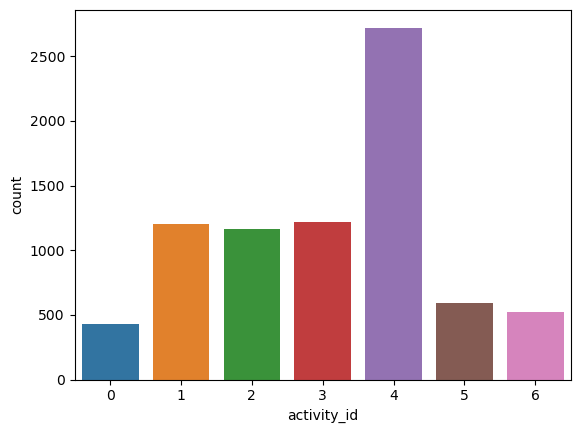

In [38]:
sns.countplot(data = df, x="activity_id")

In [39]:
le = LabelEncoder()
df["act_level"] = le.fit_transform(df["act_level"])
    
df.head()

,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
0,2,4,1,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,0.055998,...,0.068395,7.408032,-1.578947,3.224426,-0.089607,1.419706,-0.109581,0.823423,-0.033989,3.099118
1,7,5,2,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,0.186308,...,4.774907,16.373748,-4.488213,13.319767,0.268098,2.850637,-0.214467,1.461636,0.173994,4.399006
2,8,3,0,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,-0.008753,...,-7.266617,0.080816,-1.471347,0.167118,-0.000961,0.039025,0.000421,0.028817,0.005620,0.017938
3,5,5,2,-4.493177,8.047408,9.519502,15.157397,2.644789,4.397889,0.219553,...,4.253153,14.499693,-4.933189,5.644267,-0.075801,1.656742,-0.067246,1.173186,0.201805,4.822345
4,2,2,0,-1.544933,0.176979,6.506689,0.157476,7.027291,0.151310,0.001171,...,-2.435107,0.445737,-1.317451,0.891343,0.011485,0.289046,-0.030544,0.149178,0.013118,0.037660


In [40]:
X = df.drop('activity_id', axis=1)
X = X.to_numpy()
y = df['activity_id']

In [41]:
Y = pd.get_dummies(y).values

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(80,input_shape=(38,),activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                3120      
                                                                 
 dense_13 (Dense)            (None, 40)                3240      
                                                                 
 dense_14 (Dense)            (None, 20)                820       
                                                                 
 dense_15 (Dense)            (None, 7)                 147       
                                                                 
Total params: 7,327
Trainable params: 7,327
Non-trainable params: 0
_________________________________________________________________


C:\Users\a\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [44]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
197/197 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.8780 - val_loss: 0.0208 - val_accuracy: 0.9752
Epoch 2/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9707 - val_loss: 0.0802 - val_accuracy: 0.9682
Epoch 3/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9697 - val_loss: 0.0916 - val_accuracy: 0.9503
Epoch 4/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.8790 - val_loss: 0.0661 - val_accuracy: 0.8943
Epoch 5/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.8892 - val_loss: 0.0459 - val_accuracy: 0.9185
Epoch 6/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9258 - val_loss: 0.0481 - val_accuracy: 0.9191
Epoch 7/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9236 - val_loss: 0.0551 - val_accuracy: 0.9045

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00       248
           2       1.00      0.02      0.03       239
           3       0.32      1.00      0.49       231
           4       1.00      1.00      1.00       540
           5       0.55      1.00      0.71       114
           6       1.00      0.98      0.99       107

    accuracy                           0.63      1570
   macro avg       0.55      0.57      0.46      1570
weighted avg       0.65      0.63      0.54      1570

[[  0   0   0   0   1  90   0]
 [  0   0   0 248   0   0   0]
 [  0   0   4 235   0   0   0]
 [  0   0   0 231   0   0   0]
 [  0   0   0   0 540   0   0]
 [  0   0   0   0   0 114   0]
 [  0   0   0   0   0   2 105]]


C:\Users\a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


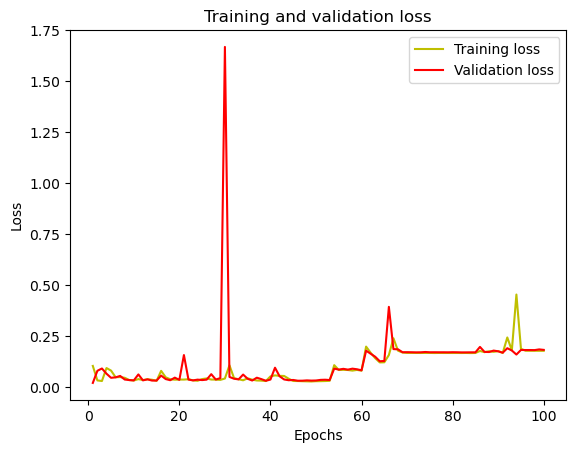

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

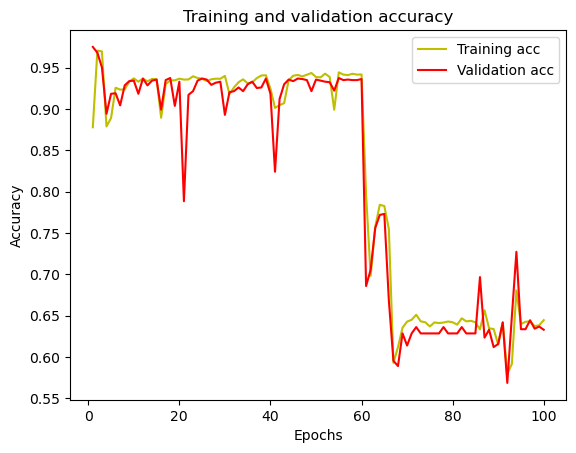

In [47]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()